In [1]:
import numpy as np
import pandas as pd
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
annual = pd.read_csv('/Users/Breee/Downloads/Annual_Macroeconomic_Factors.csv')
annual

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0
5,1980-01-01,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584.0
6,1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891.0
7,1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156.0
8,1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714.0
9,1984-01-01,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062.0


In [3]:
type(annual)

pandas.core.frame.DataFrame

In [4]:
annual.shape

(47, 9)

In [5]:
annual.columns

Index(['Date', 'House_Price_Index', 'Stock_Price_Index',
       'Consumer_Price_Index', 'Population', 'Unemployment_Rate', 'Real_GDP',
       'Mortgage_Rate', 'Real_Disposable_Income'],
      dtype='object')

In [6]:
annual.describe()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,240.145585,743.127265,198.587797,0.935152,6.310108,12140.355319,7.781053,32040.936170
std,120.405988,588.510811,75.577467,0.231639,1.623767,4243.074608,3.409098,8006.301392
min,61.090000,67.146530,65.304880,0.118380,3.666670,5648.462000,2.957690,19908.000000
25%,140.788750,209.898725,135.443420,0.862650,5.166670,8374.041000,4.863175,25432.500000
50%,211.462500,756.555290,197.805640,0.945870,5.991670,12045.824000,7.440000,31712.000000
75%,339.353750,1114.174615,262.933360,1.081575,7.441665,15645.976500,9.885575,38235.000000
max,523.260000,2255.843700,328.813530,1.386890,9.708330,19427.287000,16.641510,48219.000000


In [7]:
annual.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    47 non-null     object 
 1   House_Price_Index       47 non-null     float64
 2   Stock_Price_Index       47 non-null     float64
 3   Consumer_Price_Index    47 non-null     float64
 4   Population              47 non-null     float64
 5   Unemployment_Rate       47 non-null     float64
 6   Real_GDP                47 non-null     float64
 7   Mortgage_Rate           47 non-null     float64
 8   Real_Disposable_Income  47 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.4+ KB


In [8]:
date = pd.Series({'Unemployment_Rate':9.708330, 'Mortgage_Rate':16.641510,
                 'House_Price_Index': 523.260000})

In [9]:
date

Unemployment_Rate      9.70833
Mortgage_Rate         16.64151
House_Price_Index    523.26000
dtype: float64

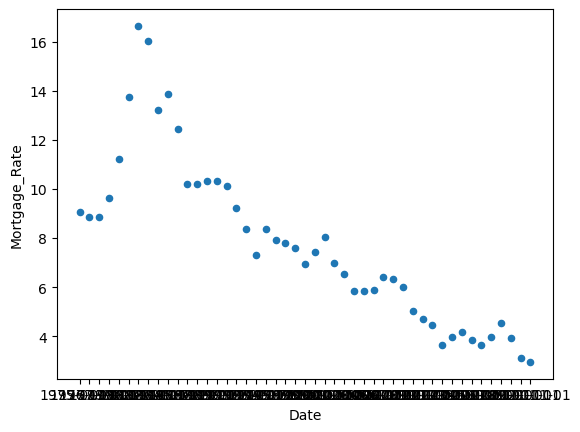

In [10]:
annual.plot.scatter(x='Date', y='Mortgage_Rate', legend=False)
plt.show()

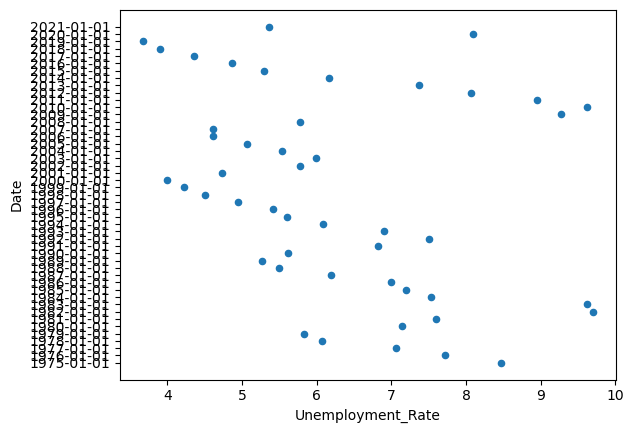

In [11]:
annual.plot.scatter(x='Unemployment_Rate', y='Date', legend=False)
plt.show()

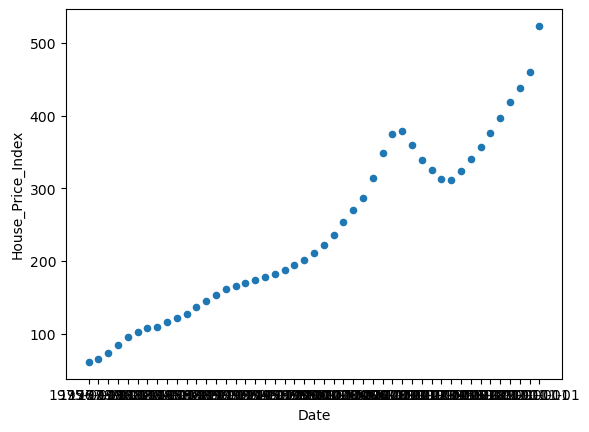

In [12]:
annual.plot.scatter(x='Date', y='House_Price_Index', legend=False)
plt.show()

In [13]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    
    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig,ax

<Axes: xlabel='Date', ylabel='House_Price_Index'>

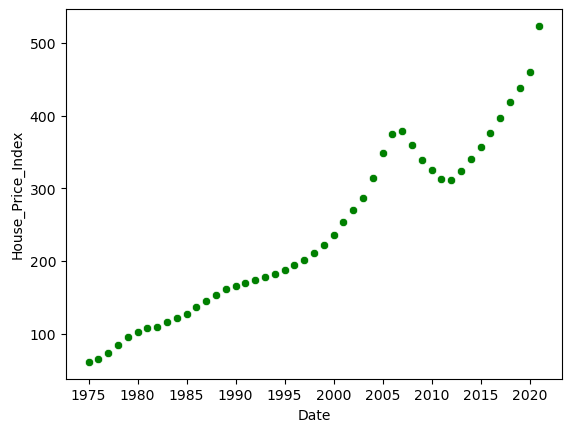

In [14]:
annual['Date']=pd.to_datetime(annual['Date'])
data_set = annual[['Date', 'House_Price_Index']]
sns.scatterplot(x='Date', y='House_Price_Index', data=data_set, color='green')

The house price index increases linearly each year. There is a sudden drop from 2007 to 2012. I guess this is due to the subprime mortgage crisis in 2007.

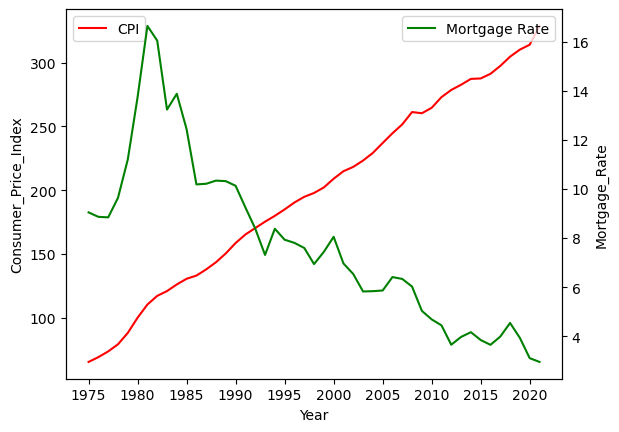

In [17]:
annual_w = pd.DataFrame({"Year": annual['Date'],
          "Consumer_Price_Index":annual['Consumer_Price_Index'],
          "Mortgage_Rate":annual['Mortgage_Rate']
                    })
sns.lineplot(x='Year', y='Consumer_Price_Index', data=annual_w, color='red')
plt.legend(labels=["CPI"])
ax2 = plt.twinx()
sns.lineplot(x='Year', y='Mortgage_Rate', data=annual_w, color='green', ax=ax2)
plt.legend(labels=["Mortgage Rate"])

The mortgage rate has be delined since 1980s. The consumer price index increases linearly as year goes by which is very normal in a developed country.

/Users/Breee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


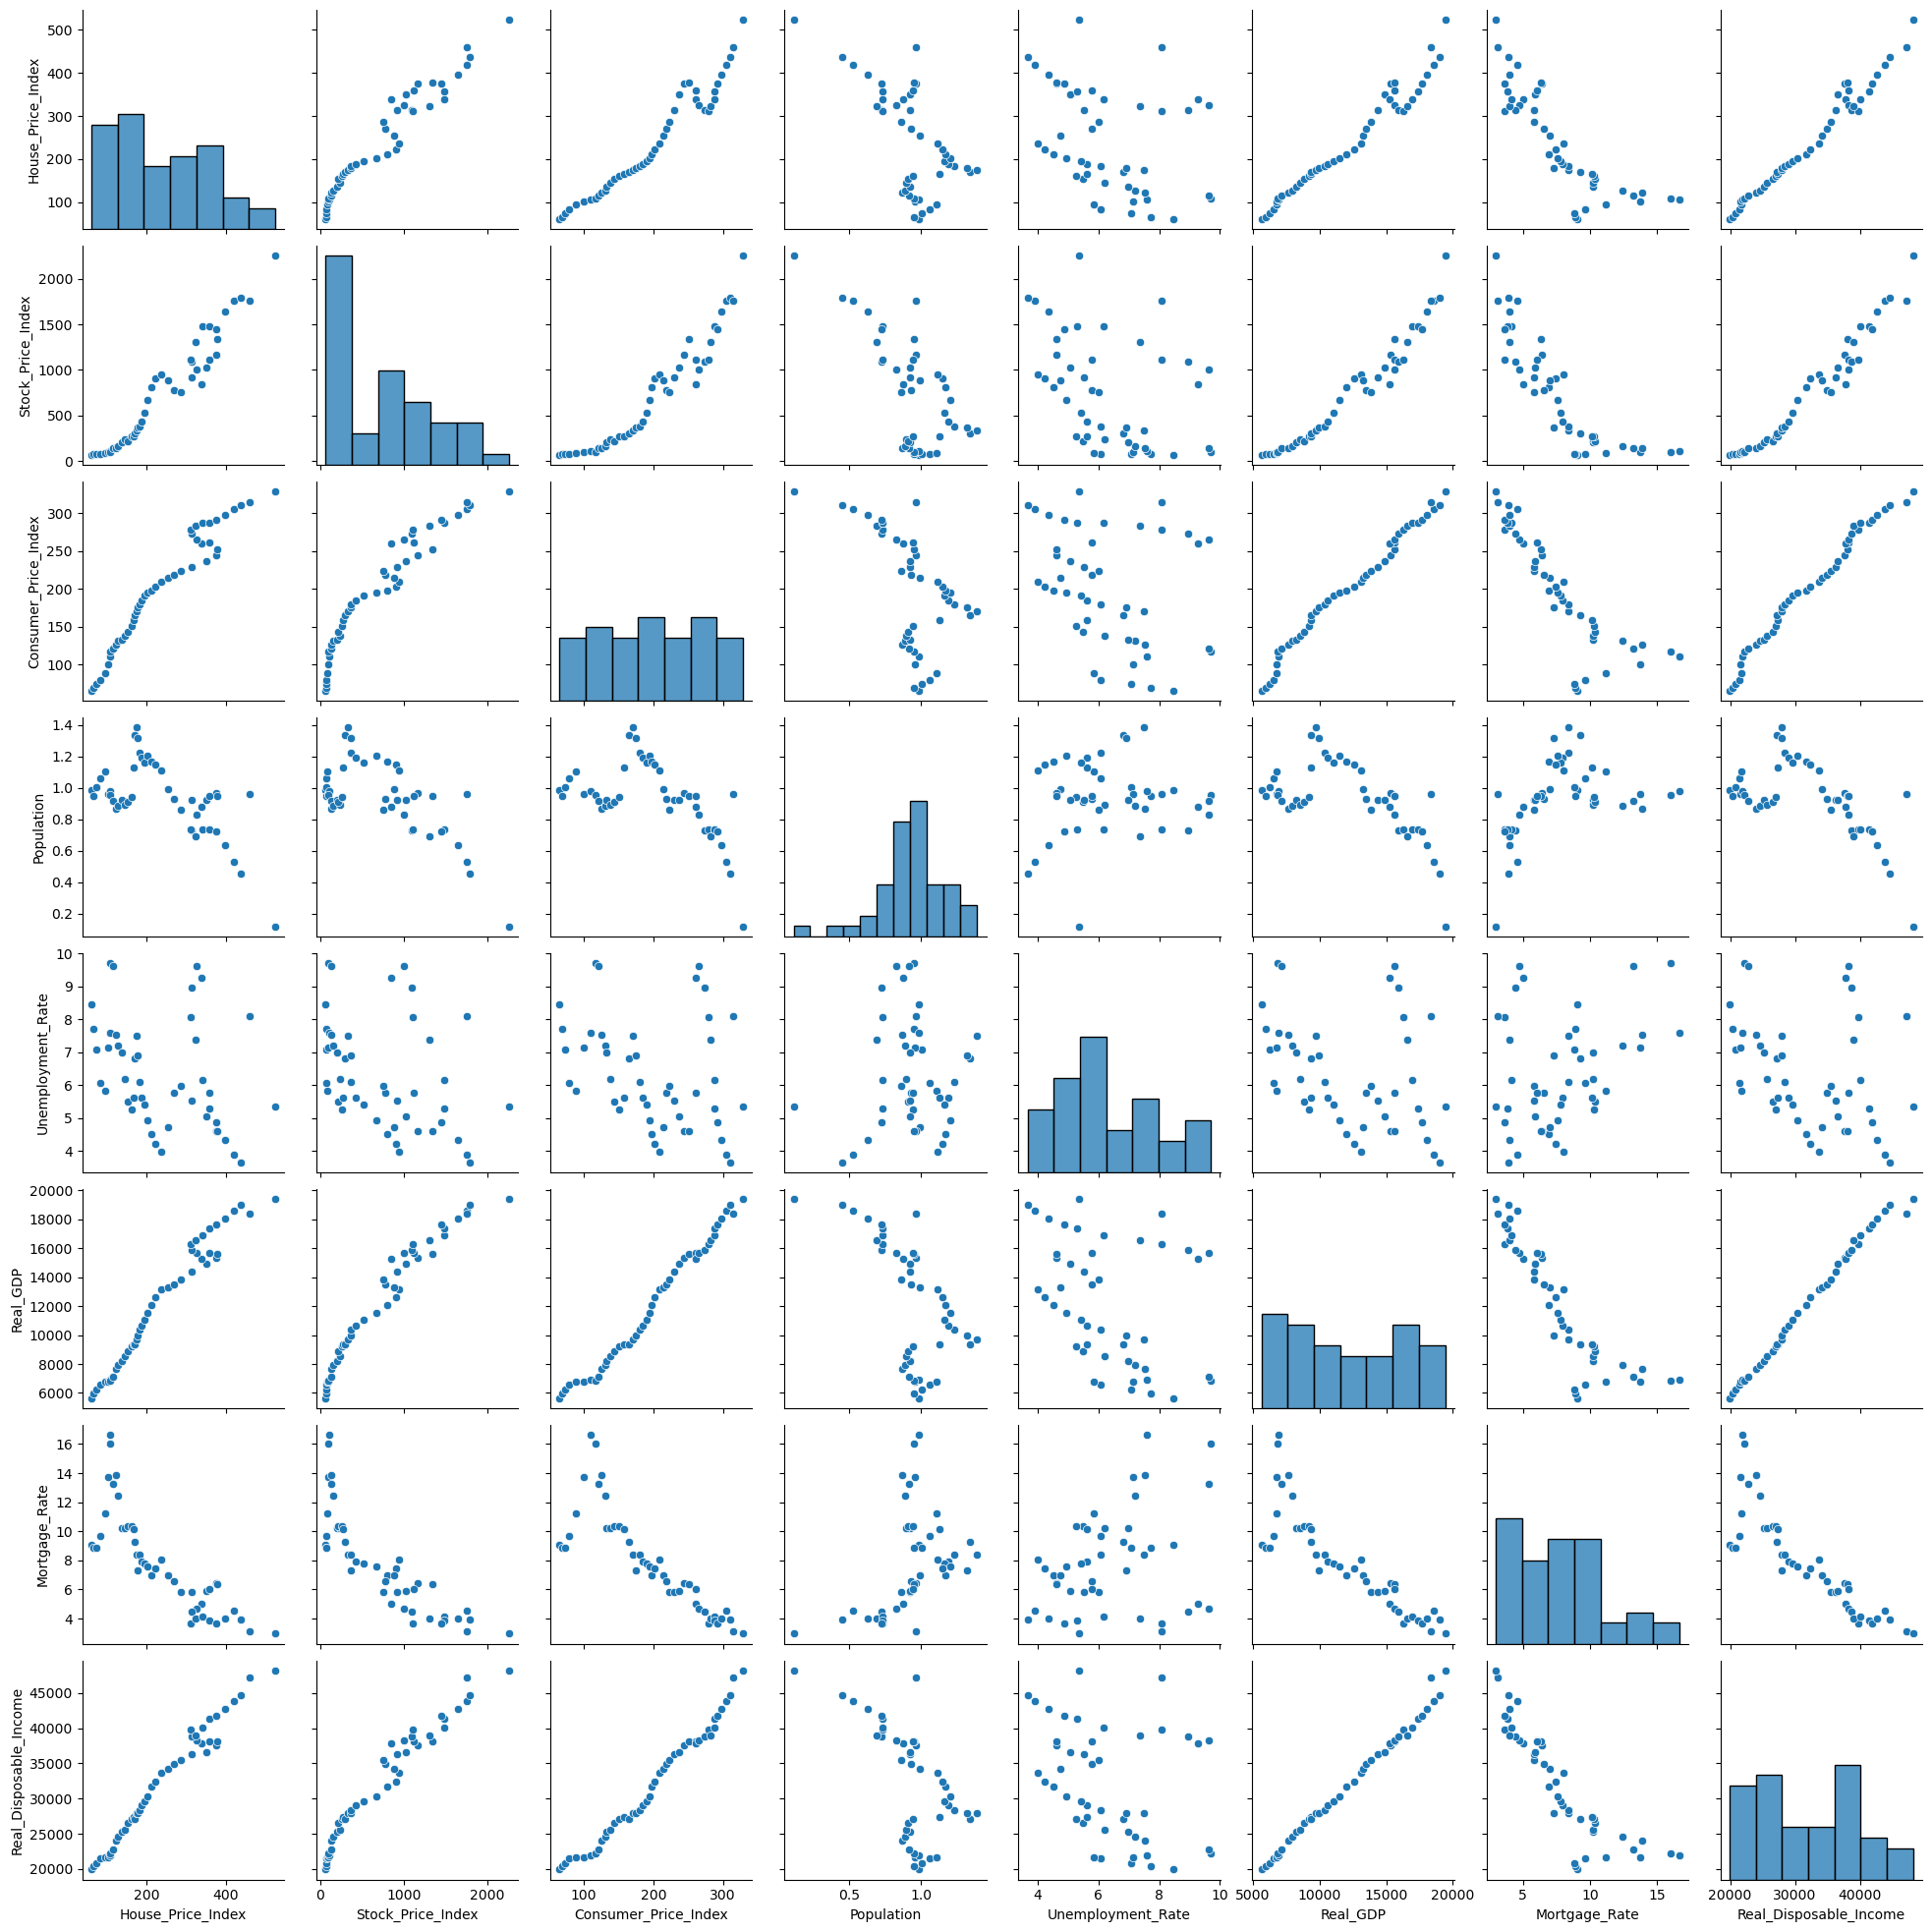

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(annual)

<Axes: xlabel='Population', ylabel='House_Price_Index'>

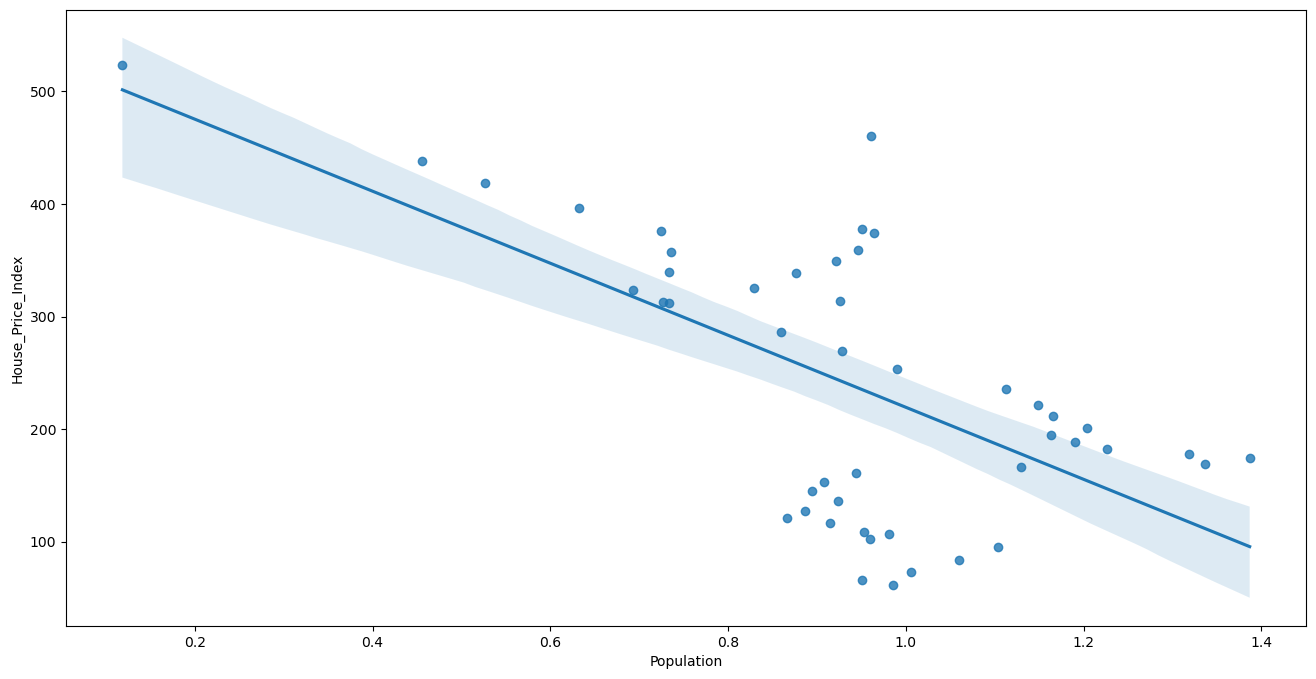

In [26]:
plt.figure(figsize=(16,8))
sns.regplot(data=annual, y='House_Price_Index', x='Population')

<Axes: xlabel='Unemployment_Rate', ylabel='House_Price_Index'>

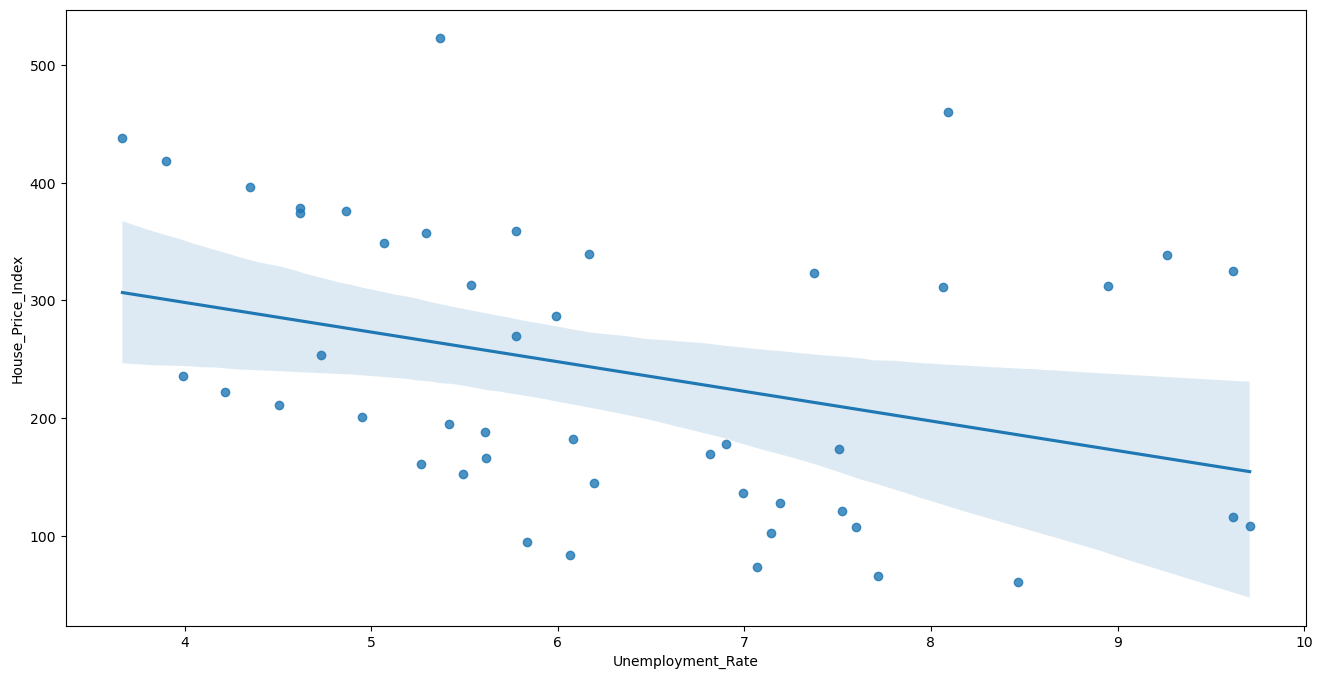

In [27]:
plt.figure(figsize=(16,8))
sns.regplot(data=annual, y='House_Price_Index', x='Unemployment_Rate')

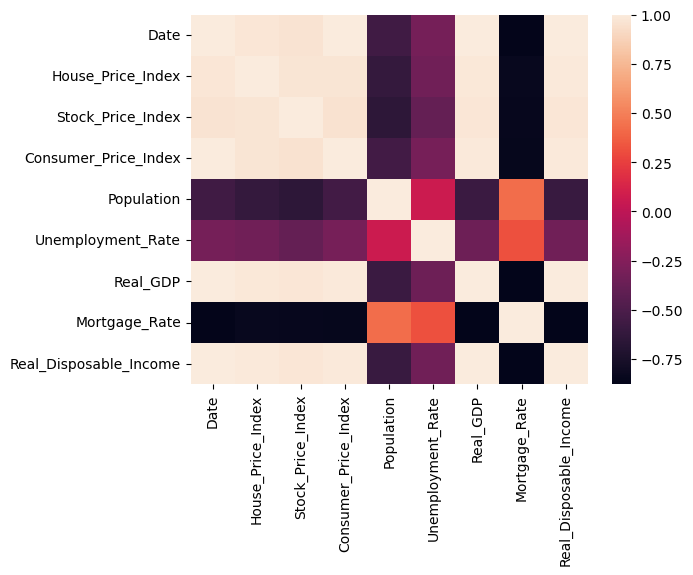

In [30]:
corr = annual.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

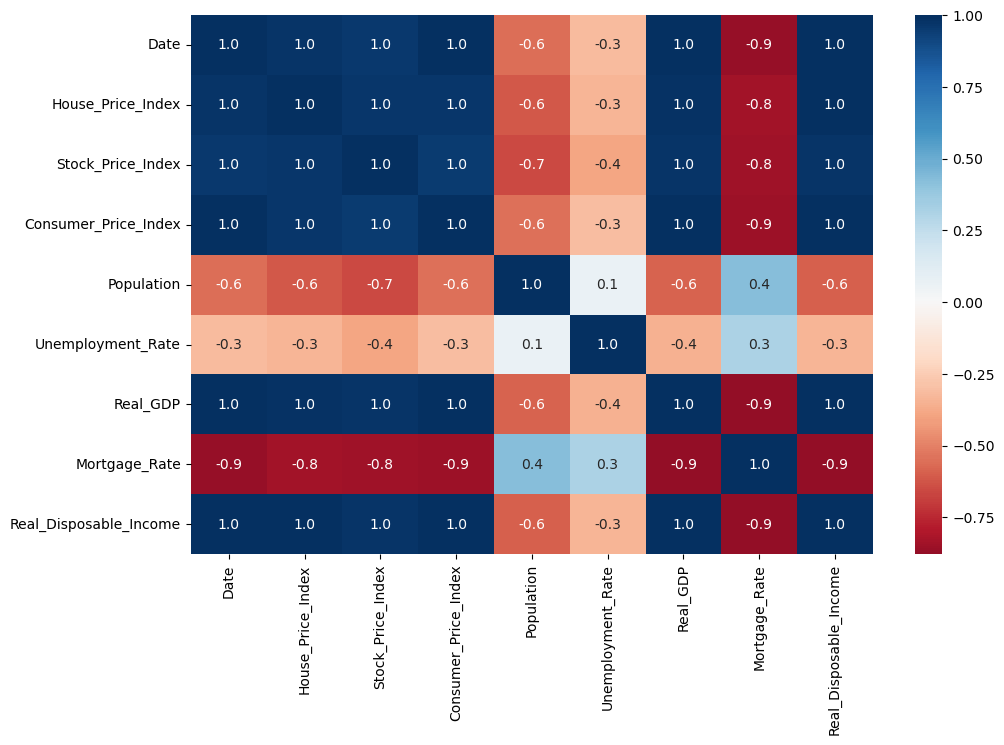

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [32]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline


In [34]:
predictors = ['Stock_Price_Index', 'Consumer_Price_Index', 'Population', 'Unemployment_Rate',
              'Real_GDP', 'Mortgage_Rate', 'Real_Disposable_Income']
outcome = 'House_Price_Index'


X = pd.get_dummies(annual[predictors], drop_first=True)
y = annual[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

annual_lm = LinearRegression()
annual_lm.fit(train_X, train_y)


print('intercept ', annual_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': annual_lm.coef_}))


regressionSummary(train_y, annual_lm.predict(train_X))

intercept  -352.8064302801672
                Predictor  coefficient
0       Stock_Price_Index    -0.011512
1    Consumer_Price_Index    -0.987254
2              Population    34.335302
3       Unemployment_Rate     0.373064
4                Real_GDP     0.029398
5           Mortgage_Rate     5.496877
6  Real_Disposable_Income     0.011321

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 14.8181
            Mean Absolute Error (MAE) : 9.8395
          Mean Percentage Error (MPE) : -0.2944
Mean Absolute Percentage Error (MAPE) : 4.6469


In [36]:
pred_y = annual_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, annual_lm))
print('AIC : ', AIC_score(train_y, pred_y, annual_lm))
print('BIC : ', BIC_score(train_y, pred_y, annual_lm))

adjusted r2 :  0.9784013191402943
AIC :  248.42803588022701
BIC :  260.4178764718038


1.0


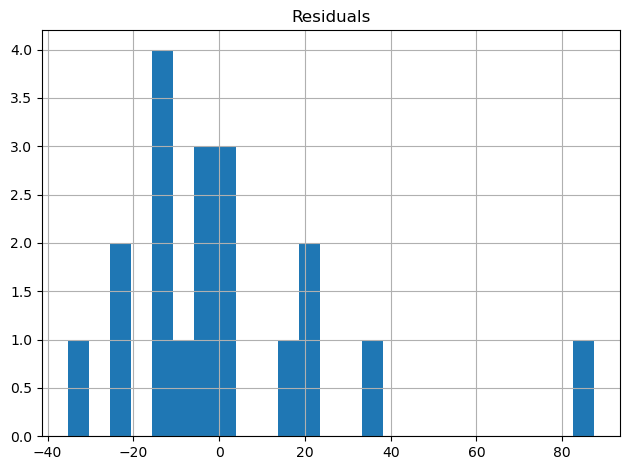

In [37]:
annual_lm_pred = annual_lm.predict(valid_X)
all_residuals = valid_y - annual_lm_pred

print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()